# Analítica de redes sociales


Autora: Beatriz Ibarra Mendoza  
Última actualización: 26/02/2024  





Este notebook analiza datos relacionados con los correos electrónicos entre los empleados de una empresa y cómo esta información forma redes que permiten identificar las interacciones entre los nodos y características inherentes a ellos. Se utilizan las paqueterías NetworkX, Matplotlib, Pandas y Numpy. El notebook incluye las siguientes etapas:  

* *Instalación* de las paqueterías.
* *Exploración* de data.  
* Construcción de *red no dirigida*.
* Determinación de *centralidades* de red.
* *Construcción de *red dirigida*.  
* *Conclusiones finales*.

### Instalación


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings('ignore')

### Exploración de data

In [ ]:
# Cargar data
df = np.loadtxt('/content/email-enron-only[1].mtx')
df

array([[ 17.,   1.],
       [ 72.,   1.],
       [  3.,   2.],
       ...,
       [135., 134.],
       [140., 134.],
       [143., 142.]])

In [ ]:
# Crear un dataframe en pandas
email = pd.DataFrame(df)
email

,0,1
0,17.0,1.0
1,72.0,1.0
2,3.0,2.0
3,19.0,2.0
4,20.0,2.0
...,...,...
618,136.0,132.0
619,141.0,133.0
620,135.0,134.0
621,140.0,134.0


### Construcción de red no dirigida


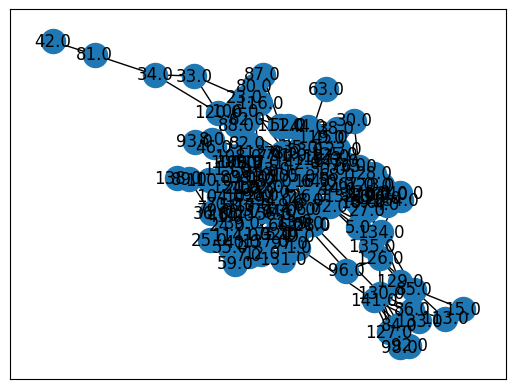

In [ ]:
# Construcción de red no dirigida
G = nx.from_pandas_edgelist(email, source=0, target=1)
nx.draw_networkx(G)

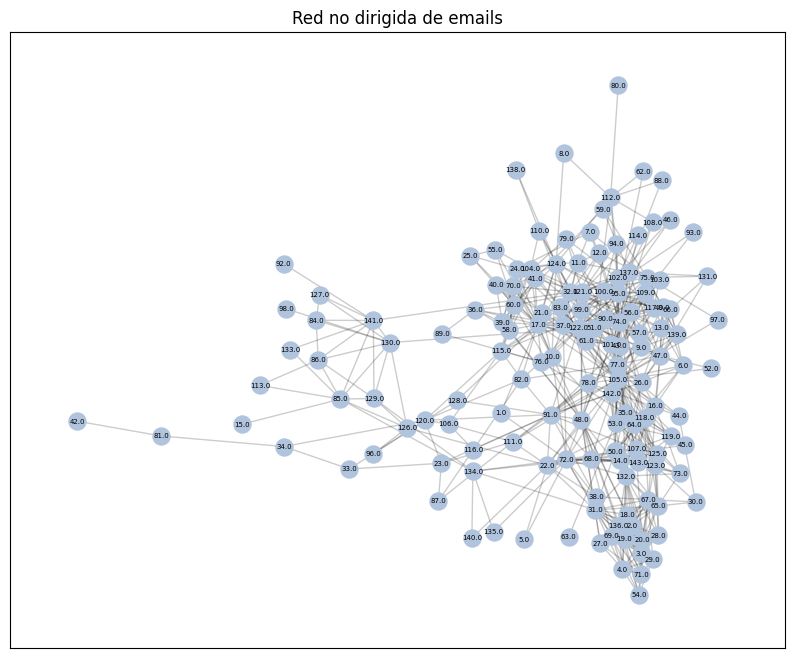

In [ ]:
# Ajustes de visualización de la red
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=150,node_color='lightsteelblue')
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_labels(G, pos, font_size=5, font_color="black")
plt.title('Red no dirigida de emails')
plt.show()

In [ ]:
# Información general de la red
num_arcos = G.number_of_edges()
num_nodos = G.number_of_nodes()

print(f'Esta red tiene {num_arcos} arcos.')
print(f'Esta red tiene {num_nodos} nodos.')

Esta red tiene 623 arcos.
Esta red tiene 143 nodos.


In [ ]:
# Métricas de la red
max_degree = max(dict(G.degree()).values())
max_degree_node = [node for node, degree in G.degree() if degree == max_degree][0]
print(f'Nodo con mayor grado en la red: {max_degree_node} ({max_degree})')

min_degree = min(dict(G.degree()).values())
min_degree_node = [node for node, degree in G.degree() if degree == min_degree][0]
print(f'Nodo con menor grado en la red: {min_degree_node} ({min_degree})')

diameter = nx.diameter(G)
print(f'Diámetro de la red: {diameter}')

avg_shortest_path_length = nx.average_shortest_path_length(G)
print(f'Distancia promedio más corta en la red: {avg_shortest_path_length}')

bipartite = nx.is_bipartite(G)
if bipartite:
  print("Esta red es bipartita.")
else:
  print("Esta red no es bipartita.")

Nodo con mayor grado en la red: 105.0 (42)
Nodo con menor grado en la red: 15.0 (1)
Diámetro de la red: 8
Distancia promedio más corta en la red: 2.967004826159756
Esta red no es bipartita.


In [ ]:
# Resiliencia de la red

# Nodos a remover para que la red sea disconexa
num_nodos_rem = nx.node_connectivity(G)
nodos_rem = nx.minimum_node_cut(G)

print(f'Hay que remover {num_nodos_rem} nodos para que esta red sea disconexa.')
print(f'Los nodos a remover son: {nodos_rem}.')

# Arcos a remover para que la red sea disconexa
num_arcos_rem = nx.edge_connectivity(G)
arcos_rem = nx.minimum_edge_cut(G)

print(f'Hay que remover {num_arcos_rem} arcos para que esta red sea disconexa.')
print(f'Los arcos a remover son: {arcos_rem}.')

Hay que remover 1 nodos para que esta red sea disconexa.
Los nodos a remover son: {85.0}.
Hay que remover 1 arcos para que esta red sea disconexa.
Los arcos a remover son: {(130.0, 98.0)}.


Con base en el análisis anterior y considerando que  hace falta remover 1 nodo y 1 arco específicos para que esta red sea disconexa, se determina que la red es lo suficientemente redundante (tiene densidad) para soportar fallas (aleatorias), sin embargo, si se suscitara un ataque (dirigido al nodo 85), la red quedaría desconectada.

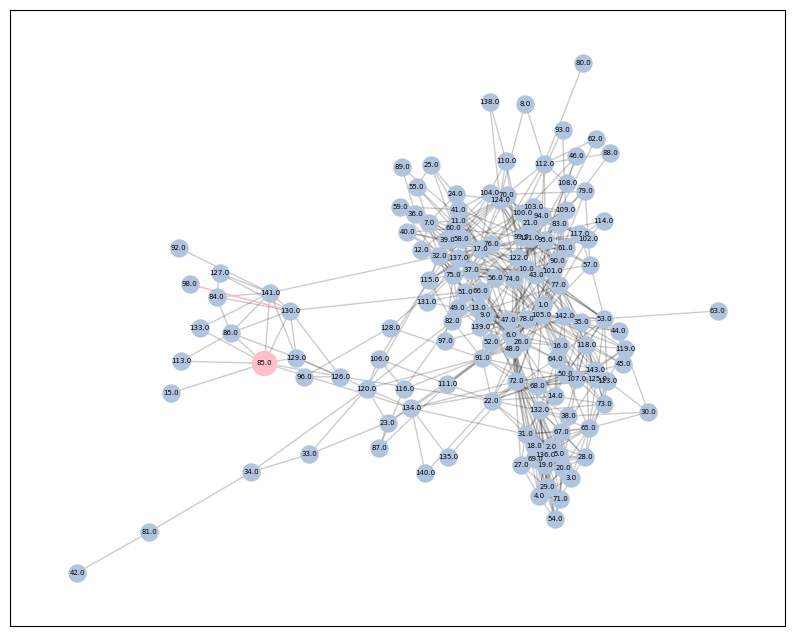

In [ ]:
# Visualización de nodos y arcos para desconectar la red
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=150, node_color='lightsteelblue')
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_labels(G, pos, font_size=5, font_color="black")
# Nodos/arcos a remover
nx.draw_networkx_nodes(G, pos, nodelist=nodos_rem, node_color='pink')
nx.draw_networkx_edges(G, pos, edgelist=arcos_rem, edge_color='pink')
plt.show()

### Determinación de centralidades de red

In [ ]:
#Visualización / aesthetics
def draw_net(G, pos, measures, title):

    plt.figure(figsize=(10,8))
    top_nodos = sorted(measures.items(), key=lambda x: x[1], reverse=True)[:10]
    node_colors = ['pink' if nodo in dict(top_nodos) else 'lightsteelblue' for nodo in measures.keys()]
    nodes = nx.draw_networkx_nodes(G, pos, node_size=150,
                                   node_color=node_colors,
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    labels = nx.draw_networkx_labels(G, pos, font_size=5, font_color='black')
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)

    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
# Centralidad de cercanía
closeness_centrality = nx.closeness_centrality(G)

In [ ]:
closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)
closeness[0:10]

[(105.0, 0.5),
 (17.0, 0.47019867549668876),
 (95.0, 0.4382716049382716),
 (74.0, 0.4369230769230769),
 (37.0, 0.4369230769230769),
 (48.0, 0.43558282208588955),
 (91.0, 0.43425076452599387),
 (43.0, 0.4316109422492401),
 (72.0, 0.42900302114803623),
 (22.0, 0.4251497005988024)]

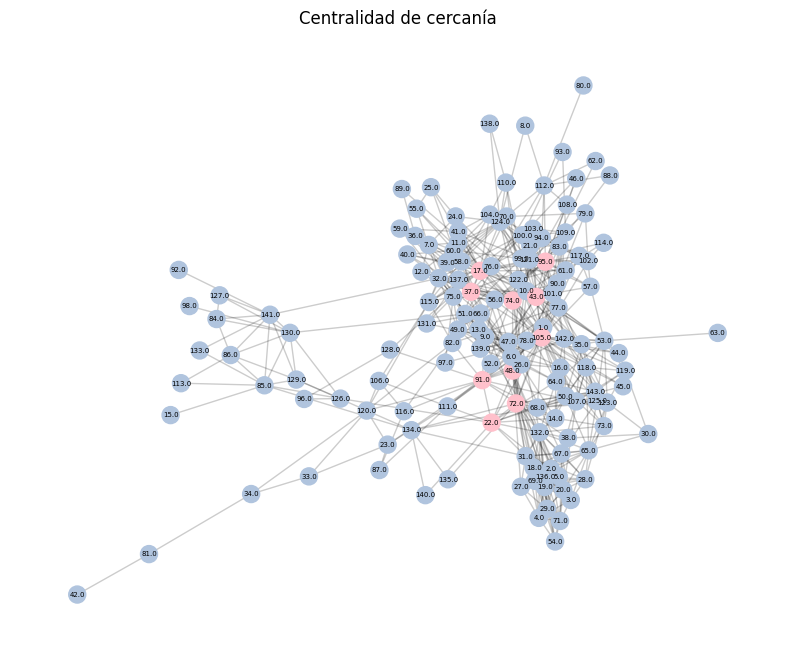

In [ ]:
draw_net(G, pos, closeness_centrality, 'Centralidad de cercanía')

In [ ]:
# Centralidad de intermediación
betweenness_centrality = nx.betweenness_centrality(G)

In [ ]:
betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)
betweenness[0:10]

[(105.0, 0.19400604344556296),
 (17.0, 0.11088210445609471),
 (48.0, 0.09673142009207425),
 (91.0, 0.09118959870866389),
 (32.0, 0.08554735598477585),
 (95.0, 0.07579595400584722),
 (141.0, 0.06345441275176905),
 (22.0, 0.05846852533268458),
 (72.0, 0.05833907970763193),
 (51.0, 0.05199434696409222)]

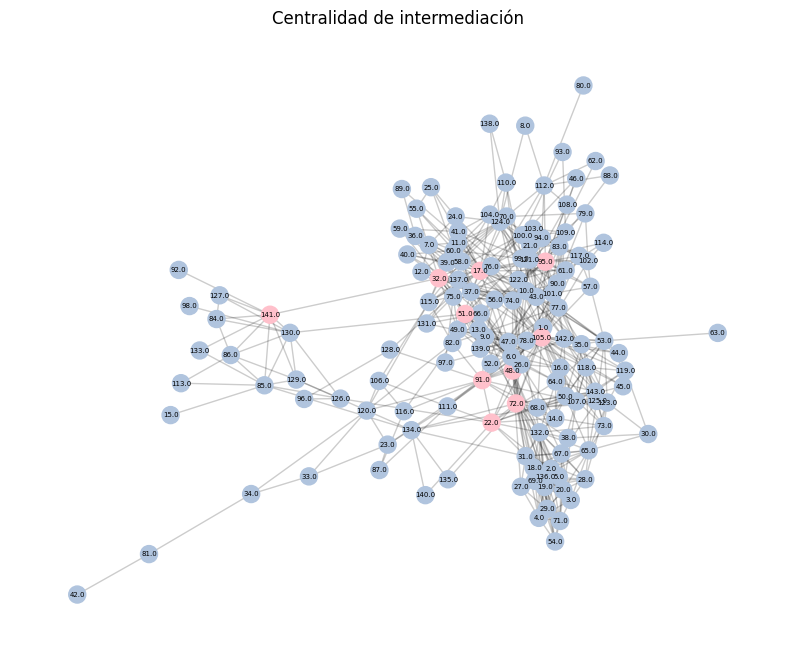

In [ ]:
draw_net(G, pos, betweenness_centrality, 'Centralidad de intermediación')

In [ ]:
# Centralidad de grado
degree_centrality=dict(G.degree())

In [ ]:
deg_cen = [(k, v) for k, v in sorted(degree_centrality.items(), key=lambda item: -item[1])]
deg_cen[0:10]

[(105.0, 42),
 (17.0, 30),
 (95.0, 23),
 (48.0, 20),
 (132.0, 19),
 (43.0, 19),
 (31.0, 18),
 (74.0, 18),
 (91.0, 18),
 (72.0, 17)]

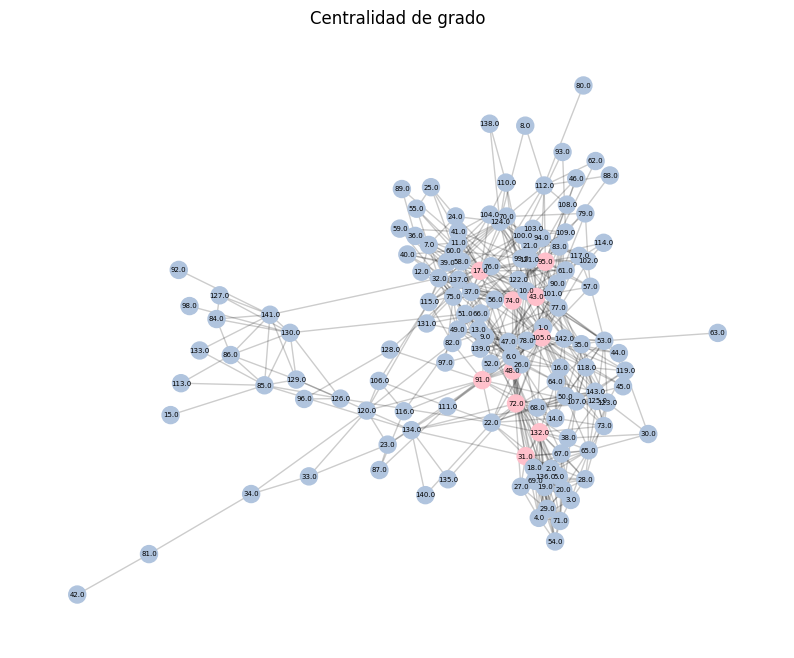

In [ ]:
draw_net(G, pos, degree_centrality, 'Centralidad de grado')

### Construcción de red dirigida

In [ ]:
# Construcción de red
G_dir = nx.DiGraph()
G_dir.add_edges_from(G.edges())

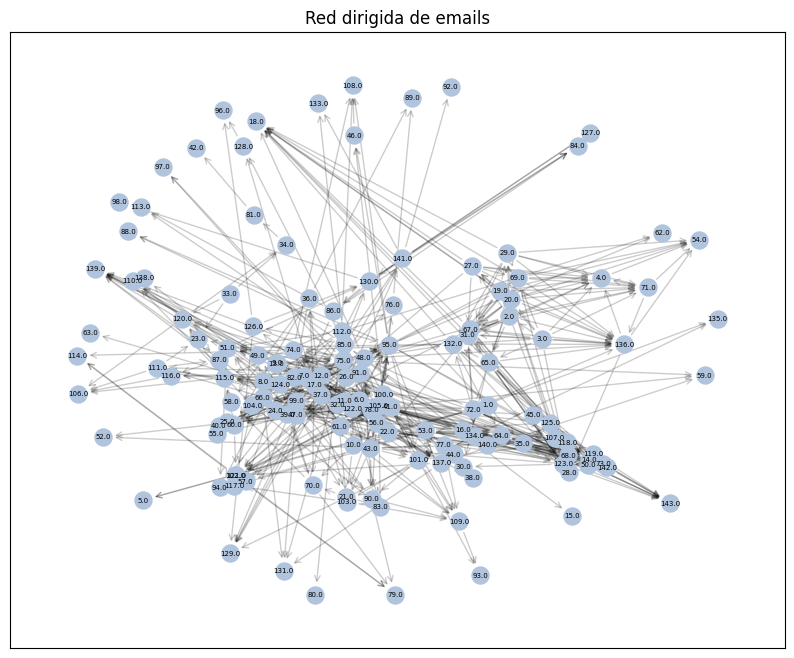

In [ ]:
# Visualización
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G_dir)
nx.draw_networkx_nodes(G_dir, pos, node_size=150,node_color='lightsteelblue')
nx.draw_networkx_edges(G_dir, pos, alpha=0.2, width=1, arrowstyle='->', arrowsize=10)
nx.draw_networkx_labels(G_dir, pos, font_size=5, font_color="black")
plt.title('Red dirigida de emails')
plt.show()

In [ ]:
# PageRank de nodos
pagerank = nx.pagerank(G_dir)
pagerank_sorted = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
pagerank_sorted

[(143.0, 0.040704961399309486),
 (118.0, 0.03036966593088755),
 (102.0, 0.025449923155512574),
 (93.0, 0.023420578342217627),
 (109.0, 0.021313677258442396),
 (79.0, 0.020781273922253395),
 (60.0, 0.019627644996063662),
 (106.0, 0.018989591079915033),
 (114.0, 0.016567467049449502),
 (54.0, 0.015988278302806302),
 (77.0, 0.01563554537890656),
 (121.0, 0.014768613581560138),
 (99.0, 0.013424984084612013),
 (123.0, 0.013302730956744979),
 (138.0, 0.013192591406768754),
 (115.0, 0.013050092241456835),
 (100.0, 0.012518187555455647),
 (110.0, 0.011887132714905156),
 (90.0, 0.011566846077478755),
 (104.0, 0.011481925264428877),
 (125.0, 0.011269915956303597),
 (42.0, 0.010428793428851016),
 (57.0, 0.010342370240608583),
 (120.0, 0.010016643058918598),
 (44.0, 0.009938092191830117),
 (142.0, 0.00952125090209582),
 (129.0, 0.009503027713090806),
 (4.0, 0.009378196130100708),
 (81.0, 0.00915529521148041),
 (108.0, 0.009048542498146375),
 (127.0, 0.008776277526285325),
 (32.0, 0.008572049564662

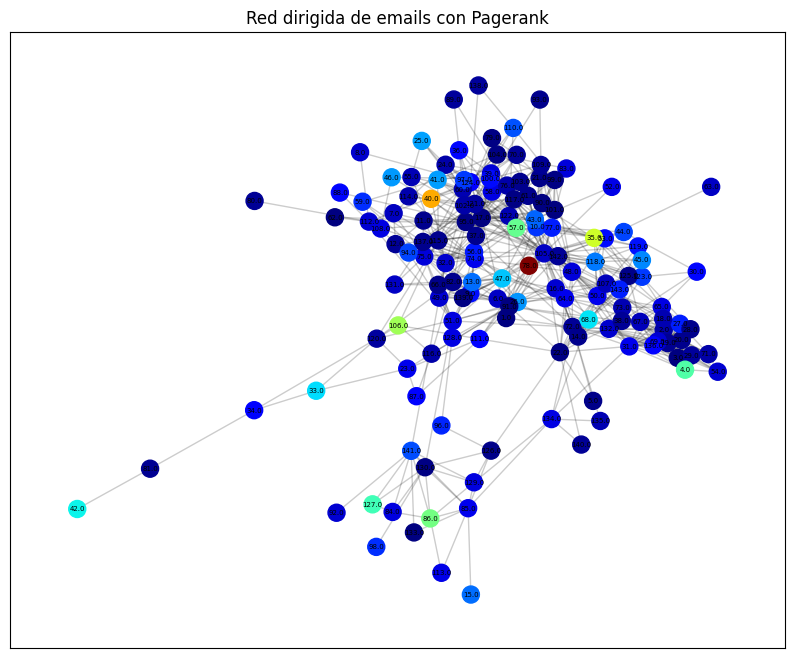

In [ ]:
# Visualización
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=150, node_color=list(pagerank.values()), cmap=plt.cm.jet)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_labels(G, pos, font_size=5, font_color="black")
plt.title('Red dirigida de emails con Pagerank')
plt.show()

### Conclusiones

Se construyeron dos redes (dirigida y no dirigida) a partir de un conjunto de datos que establece la conexión vía email entre los empleados de una empresa.A partir del análisis de estas redes se definió lo siguiente:  
* Total de empleados: 143.  
* Total de interacciones por email: 623.  
* El nodo (empleado) 105 tiene el máximo grado dentro de la red, con un total de 42 interacciones vía email. Se puede inferir que este empleado tiene un rol de liderazgo o desempeña un papel importante en la comunicación entre departamentos dentro de la empresa.
* El nodo (empleado) 15 tiene el menor grado dentro de la red, con sola una interacción vía email. Posiblemente este empleado desempeña un rol donde solo se tiene que comunicar con su jefe directo.  
* Esta red tiene un diámetro de 8, indicando que la distancia más larga (respecto a emails enviados) entre dos empleados es de 8 intermediarios. Esto puede ser indicador del tiempo que tardarían en comunicarse dos áreas distintas de la empresa o qué tan centralizada se encuentra la difusión de la información vía email.  
* El promedio de los caminos más cortos en esta red es de 2.96. En este contexto indica que un mensaje por correo electrónico llegaría a través de 2.9 (3) intermediarios, lo que podría traducirse en que los empleados están conectados de forma eficaz.  
* De acuerdo con los análisis de centralidad, los nodos más importantes en esta red son: 105, 17, 95, 48, 91, 72.  
* De acuerdo con PageRank, el nodo más importante de la red es el 143 (0.040), este puntaje se determina no solo por la cantidad de interacciones que tiene este nodo, si no por la relevancia que tienen los nodos con los que se conecta.